In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [41]:
print(x_train[29])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [25]:
#Normalize the data

#Scaling x values between 0 and 1 .This makes it easier for a neural network to learn
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

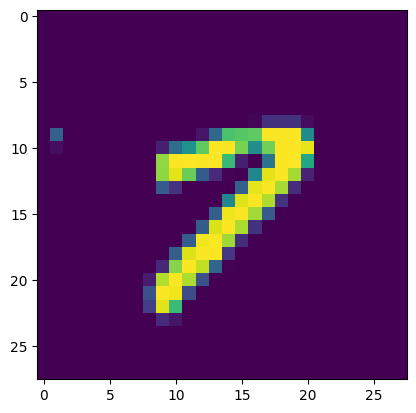

In [43]:
plt.imshow(x_train[29])



In [27]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Model creation

we will make use of the sequential model which is one of the most common models
it is a feed forward

In [29]:
#Build a  Sequential neuaral network
model =tf.keras.models.Sequential()


#input layer:flatten 2D image data into 1D array
#prepares the data for the dense layers (fully connected)
model.add(tf.keras.layers.Flatten())



#First hidden layer:128 neurons with relu activation function
#relu introduces non linearity and helps the model learn complex patterns
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))



#second hidden layer :another 128 neurons to increase the model capacity
#multiple layers allow model to learn hierarchial representations
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))



#output layer:10 neurons for (10 classes) with softmax activation function
#softmax converts outputs into probability that sum to 1
#also,the number 10 corresponds to the number of categories in our dataset,(0-9)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


#"adam" adjusts the learning rate automatically ;suitable for most use cases
#"sparse_categorical_crossentropy" is used since labels are integers and not one hot encoded
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#fewer epochs prevent overfitting and are sufficient for demonstartion on MNIST
#more epochs could slightly improve accuracy but increase training time
model.fit(x_train,y_train,epochs=3)



Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8674 - loss: 0.4629
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9658 - loss: 0.1067
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0718


In [44]:
#evaluating model performance

val_loss,val_acc=model.evaluate(x_test,y_test)

print("Loss:",val_loss,"Accuracy:",val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9509 - loss: 66.4864
Loss: 61.11217498779297 Accuracy: 0.9544000029563904


In [35]:
prediction=model.predict([x_test])

 89/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [36]:
print(np.argmax(prediction[16]))

9


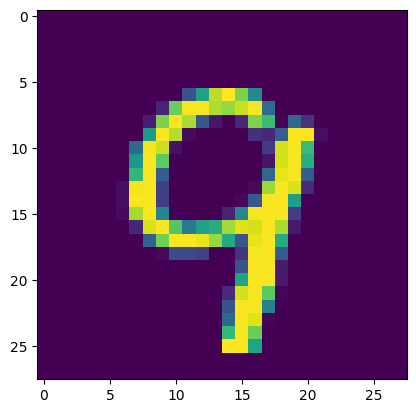

In [37]:
#prediction at index point 16 was an image of a number 9,model pricted the number is 9
plt.imshow(x_test[16])